<p style="background-color:#FDFEFE; font-family:newtimeroman; color:violet; font-size:340%; text-align:center; border-radius:10px 10px;">EDA SuperStore Analysis and Visulations</p>
<br>
<br>
<br>
<img src = https://www.perakende.org/storage/news/2018/12/7d4940f92950a962d4b6c391128494c6.jpg width="700" height="200">


<h1 style= "color : purple"><b>Giriş</b></h1>

<h3 style= "color: blue">İstek</h3>

Bir süperstore  şirketi tarafından elinize 3 yıllık bir veri verildi ve şirket sizden gelecek dönemlerde satışları arttırmak adına detaylı analizler istiyor.

<h3 style= "color: blue">Yapılması Gerekenler</h3>
Bu süperstore'da satılan eşyaların detaylı veri analizi ve görselleştirilmesi yapılarak sonraki satışlarda neye ne kadar önem vermesinin gerektiğinin araştırılması

<h3 style= "color: blue">Step1</h3>

<ol>
    <li><b>Verinin özelliklerinin gözden geçirilmesi</b></li>
    <li><b>Column'ların tanıtımları</b></li>
    <li><b>Duplicate verilerin ve missing Value'ların araştırılması</b></li>
    <li><b>DataFrame'in Temizlenmesi ve Düzenlenmesi</b></li>
</ol>

<h3 style= "color: blue">Step2</h3>
<ol>
    <li><b>Verilerin Analiz Edilmesi</b></li>
    <li><b>Analizlerin Görselleştirilmesi</b></li>
    <li><b>Analizlere ve görsellere dayalı çıkarımlar yapma</b></li>
</ol>

<h1 style= "color : purple"><b>Gelişme</b></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from termcolor import colored
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['figure.dpi'] = 70

<h2 style= "color: Aqua">Step1</h2>

<h3 style= "color: Hotpink">Verinin özelliklerinin gözden geçirilmesi</h3>

In [2]:
df = pd.read_csv("train.csv")
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
8042,8043,US-2018-133081,11/03/2018,15/03/2018,Standard Class,PV-18985,Paul Van Hugh,Home Office,United States,Cambridge,Massachusetts,2138.0,East,TEC-AC-10001772,Technology,Accessories,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,63.880
2104,2105,CA-2018-167101,24/03/2018,28/03/2018,Second Class,BM-11650,Brian Moss,Corporate,United States,New York City,New York,10009.0,East,TEC-AC-10001266,Technology,Accessories,Memorex Micro Travel Drive 8 GB,26.000
1994,1995,CA-2018-133648,25/06/2018,02/07/2018,Standard Class,ML-17755,Max Ludwig,Home Office,United States,Springfield,Oregon,97477.0,West,OFF-FA-10004395,Office Supplies,Fasteners,Plymouth Boxed Rubber Bands by Plymouth,11.304
3073,3074,CA-2017-125206,03/01/2017,05/01/2017,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,90045.0,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460
329,330,US-2017-141544,30/08/2017,01/09/2017,First Class,PO-18850,Patrick O'Brill,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-LA-10001074,Office Supplies,Labels,Round Specialty Laser Printer Labels,100.240


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**Göze ilk Çarpanlar**
<li><i>Column isimlerinin aralarında boşluk olması</i></li>
<li><i>Postal Code'da missing Value'lar</i></li>
<li><i>Postal Code'un dtype'in float olması</i></li>
<li><i>Order Date ve Ship Date Sütünün dtype'nin object olması</i></li>

In [4]:
df.shape

(9800, 18)

<h3  style= "color: Hotpink">Column'ların tanıtımları</h3>

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

<body>
    <ul>
        <li ><b style = "color : red">Order ID </b>: Sipariş Kimliği</li>
        <li><b style = "color : red">Order Date </b>: Sipariş Tarihi</li>
        <li><b style = "color : red">Ship Date </b>: Siparişlerin sevk tarihleri</li>
        <li><b style = "color : red">Ship Mode </b>: Siparişlerin Gönderim Modu</li>
        <li><b style = "color : red">Customer ID  </b>: Müşteriye Atanan Kimlik</li>
        <li><b style = "color : red">Customer Name</b>: Müşteri Adı</li>
        <li><b style = "color : red">Segment </b>: Müşterinin çalışma türü</li>
        <li><b style = "color : red">Country </b>: Müşterinin Ülkesi</li>
        <li><b style = "color : red">City </b>: Müşterinin Bulundugu Şehir</li>
        <li><b style = "color : red">State </b>: Müşterinin Bulundugu Semt</li>
        <li><b style = "color : red">Postal Code </b>: Müşterinin Posta Kodu</li>
        <li><b style = "color : red">Region </b>: Müşterinin Bölgesi</li>
        <li><b style = "color : red">Product ID </b>: Ürün Kimliği</li>
        <li><b style = "color : red">Category </b>: Ürünün Kategorisi</li>
        <li><b style = "color : red">Sub-Category </b>: Ürünün Alt Kategorisi</li>
        <li><b style = "color : red">Product Name </b>: Ürün Adı</li>
        <li><b style = "color : red">Sales </b>: Ürün Fiyatı</li>
    </ul>
</body>

<h3  style= "color: Hotpink">Duplicate verilerin ve missing Value'ların araştırılması</h3>

In [6]:
df.duplicated().sum()

0

*Duplicated veri yok*

In [7]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

*Postal Code sutununda 11 tane missing Value var*

<h3  style= "color: Hotpink">DataFrame'in Temizlenmesi ve Düzenlenmesi</h3>

<h4  style= "color: peru">Column'ların isimlerinin ilk hepsini küçük harfli ve aralıklarında boşlugu ve -'yi _'ya çevirelim</h4>

In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("-", "_")

In [9]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales'],
      dtype='object')

<h4   style= "color: peru">Missing Value'ları doldurma</h4>

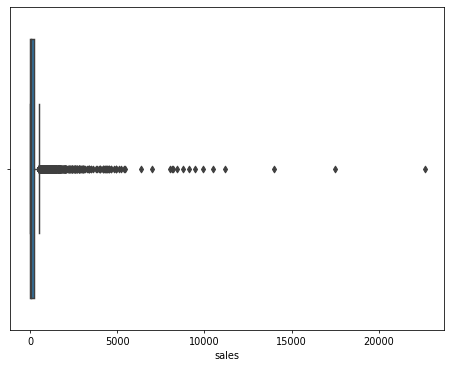

In [10]:
sns.boxplot(df.sales);

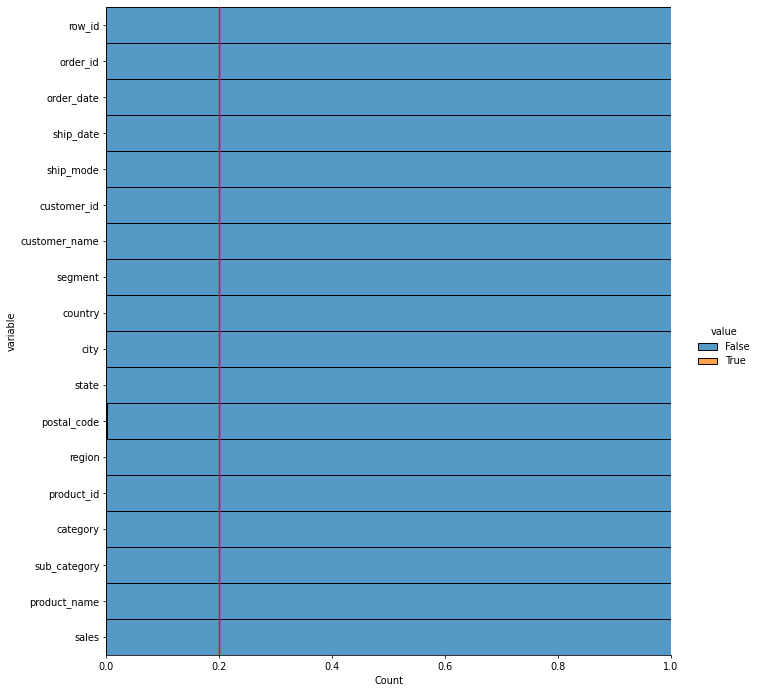

In [11]:
sns.displot(df.isnull().melt(), 
            y = "variable", 
            hue = "value", 
            multiple = "fill",
            height = 10)
plt.axvline(0.2, color = "r");

**postal_code sütununda cok az missing value var**

In [12]:
df_missing = df[["state", "postal_code"]]
df_missing

,state,postal_code
0,Kentucky,42420.0
1,Kentucky,42420.0
2,California,90036.0
3,Florida,33311.0
4,Florida,33311.0
...,...,...
9795,Illinois,60610.0
9796,Ohio,43615.0
9797,Ohio,43615.0
9798,Ohio,43615.0


*postal_code sütünü state ile bağıntılı o hale missing valuler'i state sutununa baz alarak doldurabılırız*

In [13]:
df_missing[df.postal_code.isnull()]

,state,postal_code
2234,Vermont,NaN
5274,Vermont,NaN
8798,Vermont,NaN
9146,Vermont,NaN
9147,Vermont,NaN
9148,Vermont,NaN
9386,Vermont,NaN
9387,Vermont,NaN
9388,Vermont,NaN
9389,Vermont,NaN


*Nan degerlerin hepsi Vermont state'in posta koduna ait o halde DF'de vermont sututuna ait posta code'lar ıle doldurabılırız*

In [14]:
df[df.state == "Vermont"]["postal_code"]

2234   NaN
5274   NaN
8798   NaN
9146   NaN
9147   NaN
9148   NaN
9386   NaN
9387   NaN
9388   NaN
9389   NaN
9741   NaN
Name: postal_code, dtype: float64

*Fakat DF'imizi Vermont ile sınırladıgımız zaman posta code'in hiç girilmedğini gördük**

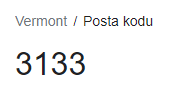
*Ufak bir araştırma ile vermont'un posta kodunun "3133" oldugunu ogrendık*

In [15]:
df.fillna(3133, inplace = True)

In [16]:
df.isnull().sum().sum()

0

*DF'imizde null değerler kalmadı*

<h4   style= "color: peru">Column'ların dtype'in duzenlenmesi</h4>

In [17]:
df.dtypes

row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code      float64
region            object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
dtype: object

***order_date, ship date ve postal_code sutununun türünü degıstırelım***

In [18]:
df.order_date = pd.to_datetime(df.order_date)
df.ship_date = pd.to_datetime(df.ship_date)

In [19]:
df.order_date.dtypes

dtype('<M8[ns]')

In [20]:
df.ship_date.dtypes

dtype('<M8[ns]')

In [21]:
df.postal_code = df.postal_code.astype(int)

In [22]:
df.postal_code.dtypes

dtype('int32')

In [23]:
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int32
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
dtype: object

<h2 style= "color: Aqua">Step2</h2>

In [24]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


<h3 style= "color: Green"><i>Sales</i> Column</h3>

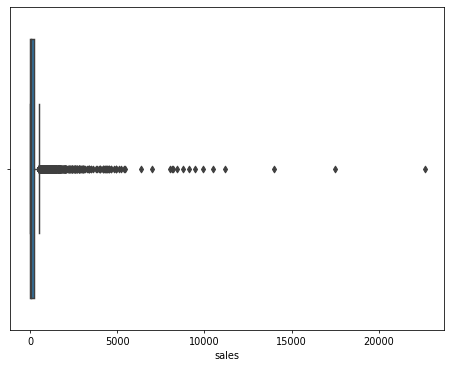

In [25]:
sns.boxplot(df.sales);

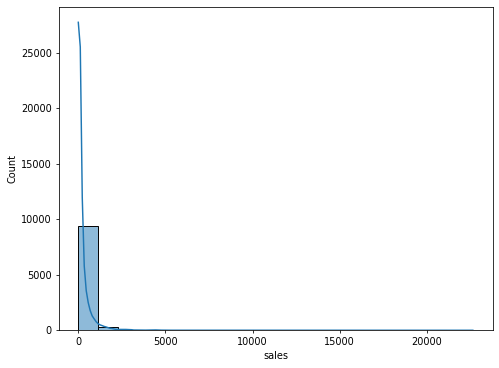

In [26]:
sns.histplot(df.sales, bins = 20, kde = True);

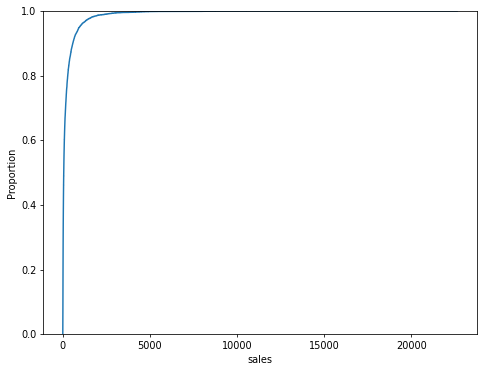

In [27]:
sns.ecdfplot(df.sales);

**Süpermarket olduğu için fiyatların bu denli dağınık olması oldukça normal karşılanabilir**

<h3 style= "color: Red">Sales vs Customer Name</h3>

In [28]:
df.customer_name.value_counts()

William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Anthony O'Donnell       1
Name: customer_name, Length: 793, dtype: int64

**En fazla Alışveriş yapan kişi William Brown**

In [29]:
df.groupby("customer_name").sales.sum().sort_values(ascending = False)

customer_name
Sean Miller        25043.050
Tamara Chand       19052.218
Raymond Buch       15117.339
Tom Ashbrook       14595.620
Adrian Barton      14473.571
                     ...    
Mitch Gastineau       16.739
Carl Jackson          16.520
Sung Chung            14.112
Lela Donovan           5.304
Thais Sissman          4.833
Name: sales, Length: 793, dtype: float64

**En fazla alışveriş yapan kişi William Brown olmasına rağmen süpersore'da en fazla harcama kişi Sean Miller'dır**

<h3 style= "color: Red">Sales vs Segment</h3>

In [30]:
df.segment.value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: segment, dtype: int64

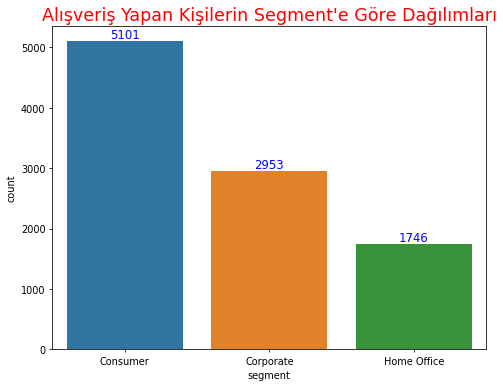

In [31]:
ax = sns.countplot(df.segment)

plt.title("Alışveriş Yapan Kişilerin Segment'e Göre Dağılımları", color = "red", size = 18)
plt.bar_label(ax.containers[0], color = "blue", size = 12);

**En fazla Alışveriş yapan segment Consumer**

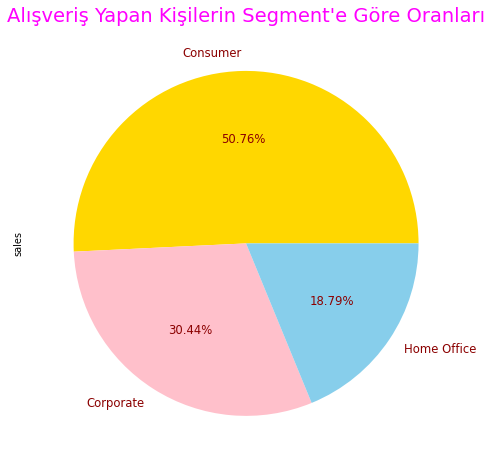

In [32]:
df.groupby("segment").sales.sum().plot(kind = "pie",
                                       autopct = "%.2f%%",
                                       colors = ["gold", "pink", "skyblue"],
                                       figsize = (10,8),
                                       textprops = {"color" : "darkred",
                                                    "size" : "12"})
plt.title("Alışveriş Yapan Kişilerin Segment'e Göre Oranları", size = 20, color = "magenta", fontweight = 5);

**Süperstore'un gelirinin yarısı Consumer("Tüketici") grubundan gelmektedir**

<h3 style= "color: Red">Sales vs Country</h3>

In [33]:
df.country.value_counts()

United States    9800
Name: country, dtype: int64

**Müşteriler sadece United States(Amerika)'da bulundugu için ek herhangi bilgiye bakmamıza gerek yoktur**

<h3 style= "color: Red">Sales vs Region</h3>

In [34]:
df.region.value_counts()

West       3140
East       2785
Central    2277
South      1598
Name: region, dtype: int64

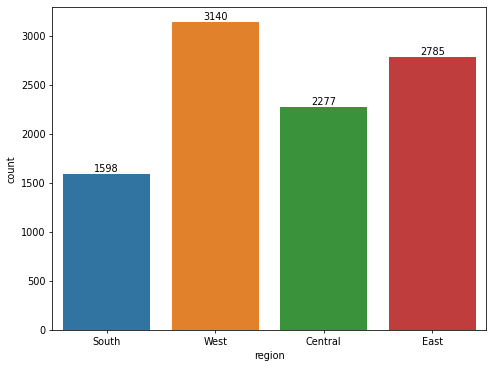

In [35]:
ax = sns.countplot(x = df.region)
plt.bar_label(ax.containers[0]);

**En fazla alışveriş West(Batı) bölgesinden**

In [36]:
df.groupby("region").sales.sum()

region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: sales, dtype: float64

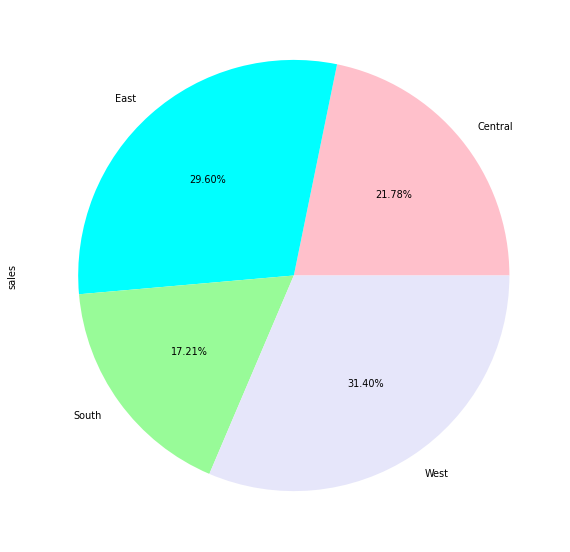

In [37]:
df.groupby("region").sales.sum().plot(kind = "pie",
                                      colors = ["pink", "cyan", "palegreen", "lavender"],
                                      figsize = (12,10),
                                      autopct = "%.2f%%");

**Gelirlerin yaklasık %30'u West(Batı) bölgesinden gelmektedir**

<h3 style= "color: Red">Sales vs State</h3>

In [38]:
df.state.value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

**Müşteriler En fazla California eyaletinden alışveriş yapmıştır**

In [39]:
df.groupby("state").sales.sum().sort_values(ascending = False)

state
California              446306.4635
New York                306361.1470
Texas                   168572.5322
Washington              135206.8500
Pennsylvania            116276.6500
Florida                  88436.5320
Illinois                 79236.5170
Michigan                 76136.0740
Ohio                     75130.3500
Virginia                 70636.7200
North Carolina           55165.9640
Indiana                  48718.4000
Georgia                  48219.1100
Kentucky                 36458.3900
Arizona                  35272.6570
New Jersey               34610.9720
Colorado                 31841.5980
Wisconsin                31173.4300
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27322.9990
Maryland                 23705.5230
Rhode Island             22525.0260
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

**En fazla gelir sayıya da baglı olarak California'dan gelmektedir**

<h3 style= "color: Red">Sales vs City</h3>

In [40]:
df.city.value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: city, Length: 529, dtype: int64

**Müşteriler en fazla NewYorktan**

In [41]:
df.groupby("city").sales.sum().sort_values(ascending = False)

city
New York City    252462.547
Los Angeles      173420.181
Seattle          116106.322
San Francisco    109041.120
Philadelphia     108841.749
                    ...    
Ormond Beach          2.808
Pensacola             2.214
Jupiter               2.064
Elyria                1.824
Abilene               1.392
Name: sales, Length: 529, dtype: float64

**Süperstor'a en fazla gelir kaynagı olan şehir yine NewYork**

<h3 style= "color: Red">Sales vs Product-Name</h3>

In [42]:
df.product_name.value_counts()

Staple envelope                                                        47
Staples                                                                46
Easy-staple paper                                                      44
Avery Non-Stick Binders                                                20
Staples in misc. colors                                                18
                                                                       ..
Xiaomi Mi3                                                              1
Universal Ultra Bright White Copier/Laser Paper, 8 1/2" x 11", Ream     1
Socket Bluetooth Cordless Hand Scanner (CHS)                            1
Logitech Illuminated Ultrathin Keyboard with Backlighting               1
LG G2                                                                   1
Name: product_name, Length: 1849, dtype: int64

**Bu zamana kadar en fazla Staple Envelope(Zımba Zarfı) satılmıştır**

In [43]:
df.groupby("product_name").sales.sum().sort_values(ascending = False)

product_name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
                                                                                 ...    
Acme Serrated Blade Letter Opener                                                  7.632
Grip Seal Envelopes                                                                7.072
Xerox 20                                                                           6.480
Avery 5                                                                            5.760
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac                   1.624
Name: sa

**En fazla gelir sağlayan Canon imageCLASS 2200 Advanced Copier adlı ürün olmuştur**

<h3 style= "color: Red">Sales vs Order Date</h3>

**Order Date sutununu ay ve yıl olmak üzere iki gruba ayıralım ve yıllara ve aylara gore degısıklıklerı ınceleyelım**

In [44]:
df["order_date_year"] = df.order_date.dt.year
df["order_date_month"] = df.order_date.dt.month

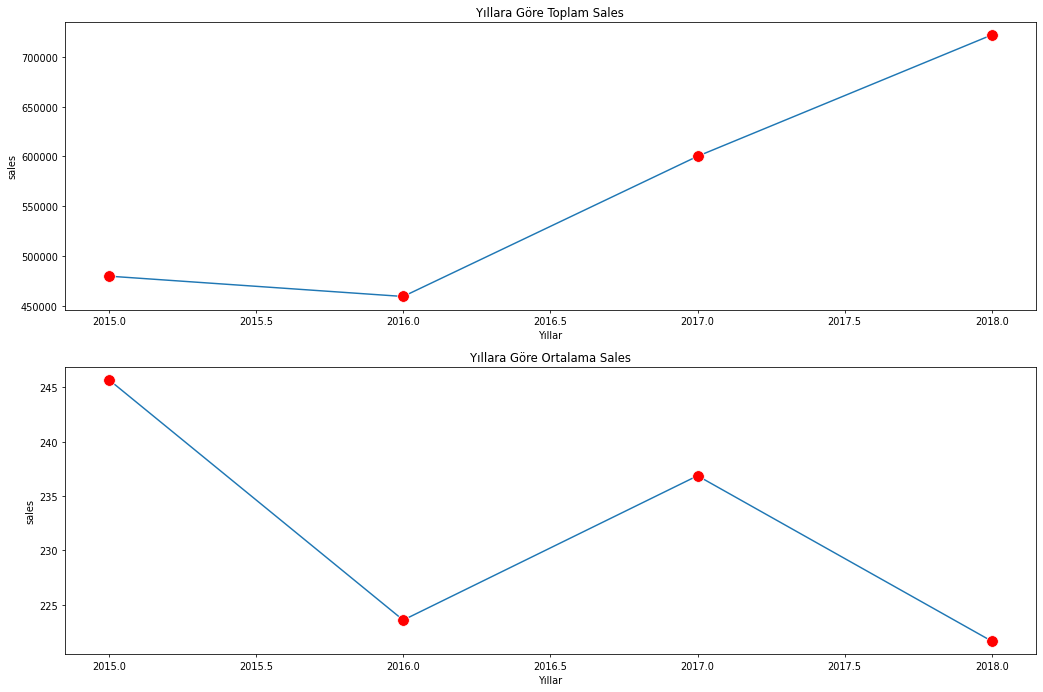

In [45]:
fig, ax = plt.subplots(2,1, figsize = (15,10))

sns.lineplot(x = df.order_date_year, 
             y = df.sales, ci = None, 
             estimator = np.sum, ax = ax[0], 
             marker = "o", markersize = 12, markerfacecolor = "red")
ax[0].set_title("Yıllara Göre Toplam Sales")
ax[0].set_xlabel("Yıllar")

sns.lineplot(x = df.order_date_year, y = df.sales, ci = None, ax = ax[1], marker = "o", markersize = 12, markerfacecolor = "red")
ax[1].set_title("Yıllara Göre Ortalama Sales")
ax[1].set_xlabel("Yıllar")


plt.tight_layout()

**Yıllara göre Toplam Harcama artarken ortalamayı baz aldıgımızda genel itibariyle bir düşüş yaşanmış**

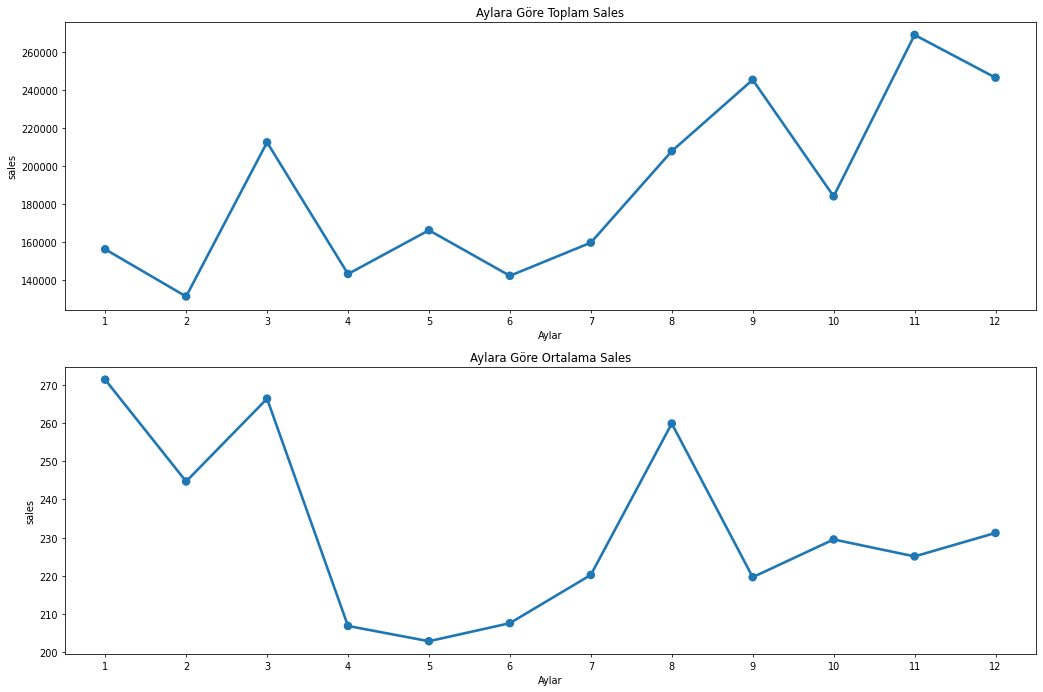

In [46]:
fig, ax = plt.subplots(2,1, figsize = (15,10))

sns.pointplot(x = df.order_date_month, y = df.sales, ci = None, estimator = np.sum, ax = ax[0])
ax[0].set_title("Aylara Göre Toplam Sales")
ax[0].set_xlabel("Aylar")

sns.pointplot(x = df.order_date_month, y = df.sales, ci = None, ax = ax[1])
ax[1].set_title("Aylara Göre Ortalama Sales")
ax[1].set_xlabel("Aylar")


plt.tight_layout()

**Toplam satış tutarlarında Kasım ayı zirvede iken ortalama kazançta Ocak ayı baskın**

<h3 style= "color: Red">Sales vs Ship Date</h3>

**Ship Date sutununu ay ve yıl olmak üzere iki gruba ayıralım ve yıllara ve aylara gore degısıklıklerı ınceleyelım**

In [47]:
df["ship_date_year"] = df.ship_date.dt.year
df["ship_date_month"] = df.ship_date.dt.month

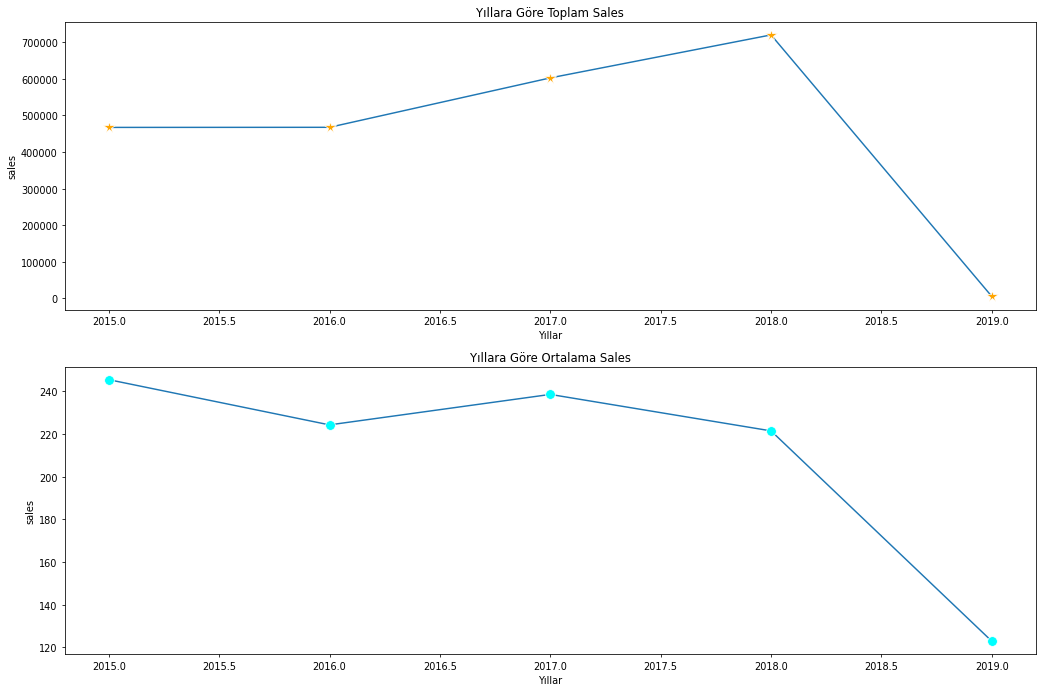

In [48]:
fig, ax = plt.subplots(2,1, figsize = (15,10))

sns.lineplot(x = df.ship_date_year, 
             y = df.sales, ci = None, 
             estimator = np.sum, ax = ax[0], 
             marker = "*", markersize = 12, markerfacecolor = "orange")
ax[0].set_title("Yıllara Göre Toplam Sales")
ax[0].set_xlabel("Yıllar")

sns.lineplot(x = df.ship_date_year, y = df.sales, ci = None, ax = ax[1], marker = "o", markersize = 10, markerfacecolor = "cyan")
ax[1].set_title("Yıllara Göre Ortalama Sales")
ax[1].set_xlabel("Yıllar")


plt.tight_layout()

**2018 yılında toplam sales zirve durumda fakat 2019 yılına kadar ciddi bir düşüş yasanmış. Ortlama Sales de 2017 ılından beri düşüşte**

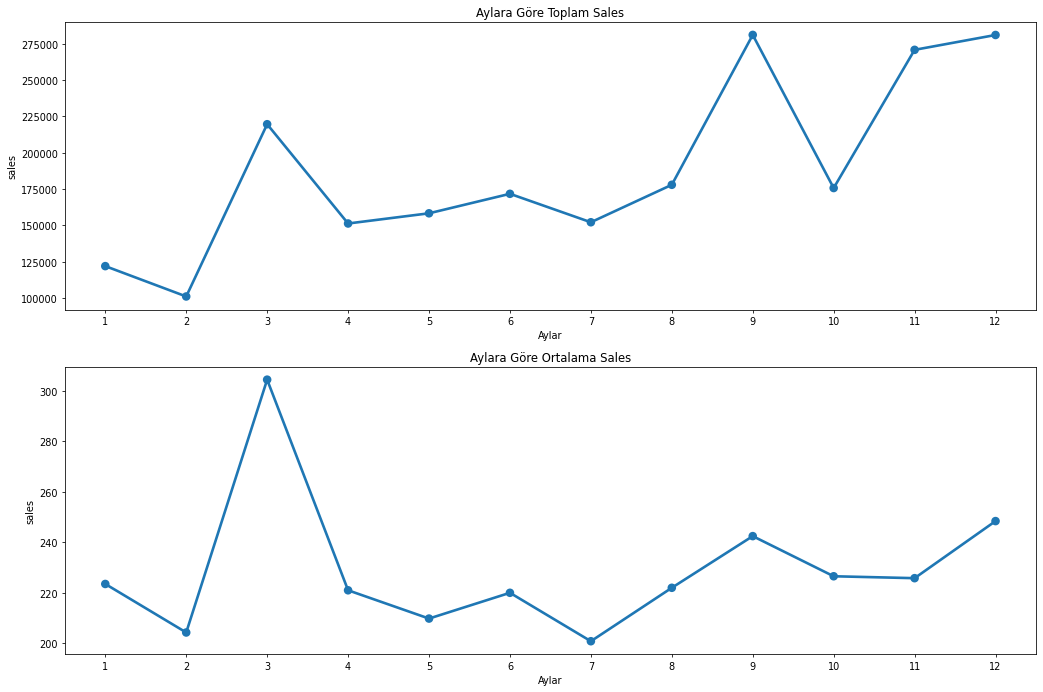

In [49]:
fig, ax = plt.subplots(2,1, figsize = (15,10))

sns.pointplot(x = df.ship_date_month, y = df.sales, ci = None, estimator = np.sum, ax = ax[0])
ax[0].set_title("Aylara Göre Toplam Sales")
ax[0].set_xlabel("Aylar")

sns.pointplot(x = df.ship_date_month, y = df.sales, ci = None, ax = ax[1])
ax[1].set_title("Aylara Göre Ortalama Sales")
ax[1].set_xlabel("Aylar")


plt.tight_layout()

**Eylül Ayında Toplam kazanc zirvede iken ortlamada mart ayı goz onundedir**

<h3 style= "color: Red">Sales vs Ship Mode</h3>

In [50]:
df.ship_mode.value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: ship_mode, dtype: int64

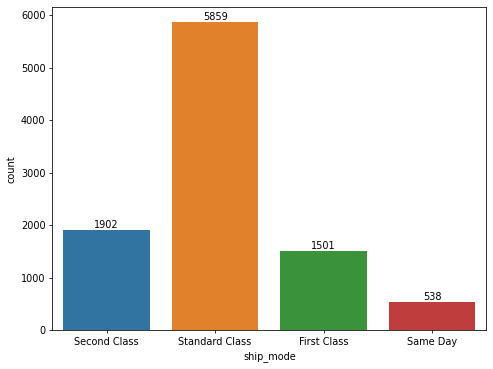

In [51]:
ax = sns.countplot(x = df.ship_mode)
plt.bar_label(ax.containers[0]);

**Standart Taşıma en fazla talep edilen tür**

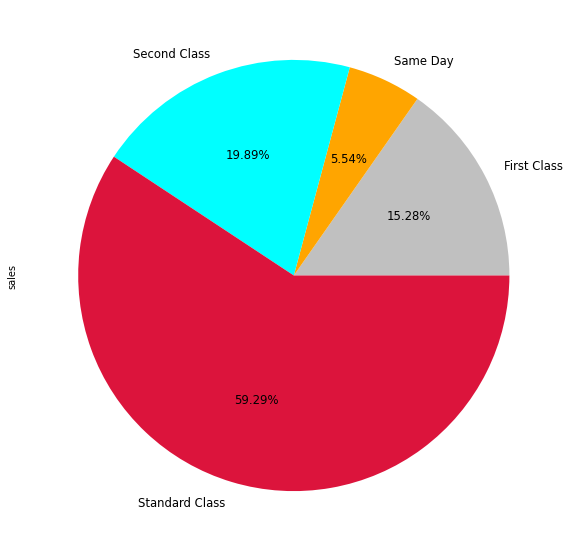

In [52]:
df.groupby("ship_mode").sales.sum().plot(kind = "pie",
                                        colors = ["silver", "orange", "aqua", "crimson"],
                                        figsize = (12,10),
                                        autopct = "%.2f%%",
                                        fontsize = 12);

**En fazla gelir saglayan tasıma yontemi yine standart Class'tır**

<h3 style= "color: Red">Sales vs Category and Sub-Category</h3>

In [53]:
df.category.value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: category, dtype: int64

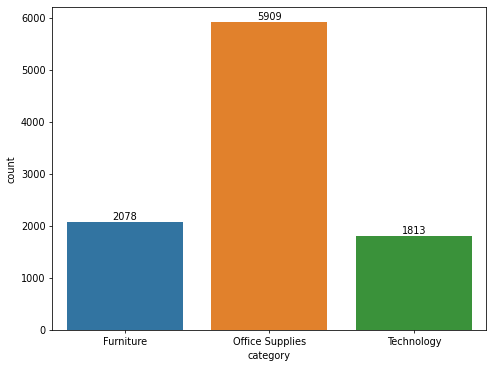

In [54]:
ax = sns.countplot(x = df.category)
plt.bar_label(ax.containers[0]);

**En fazla alışveriş Office Supplies kategorisinde olmuştur**

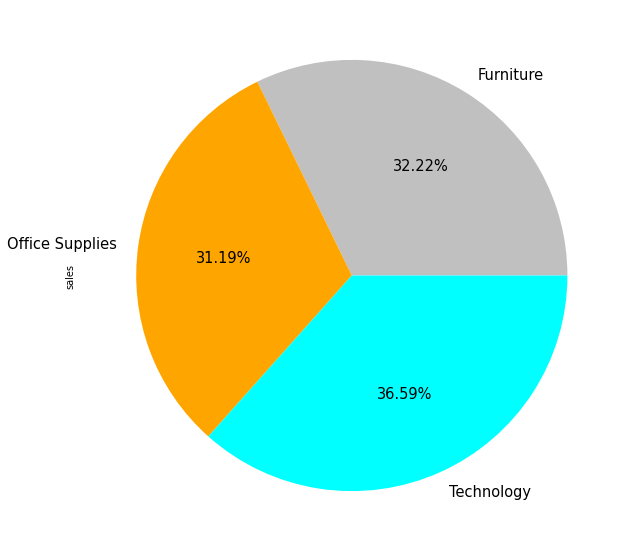

In [55]:
df.groupby("category").sales.sum().plot(kind = "pie",
                                        colors = ["silver", "orange", "aqua"],
                                        figsize = (12,10),
                                        autopct = "%.2f%%",
                                        fontsize = 15);

**En fazla gelir de Technology kategorisinden gelmektedir**

**Ürünler 3 kategoriye ayrılmış. Ayrı Ayrı inceleyelim**

<h4 style= "color: Darkviolet">Sales vs Furniture Values and Sub-Category</h4>

In [56]:
df_furniture = df[df.category == "Furniture"]
df_furniture.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub_category,product_name,sales,order_date_year,order_date_month,ship_date_year,ship_date_month
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,2017,11
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,2017,11
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,2016,10
5,6,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,2015,9,2015,6
10,11,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,2015,9,2015,6


In [57]:
df_furniture.shape

(2078, 22)

In [58]:
df_furniture.sub_category.value_counts()

Furnishings    931
Chairs         607
Tables         314
Bookcases      226
Name: sub_category, dtype: int64

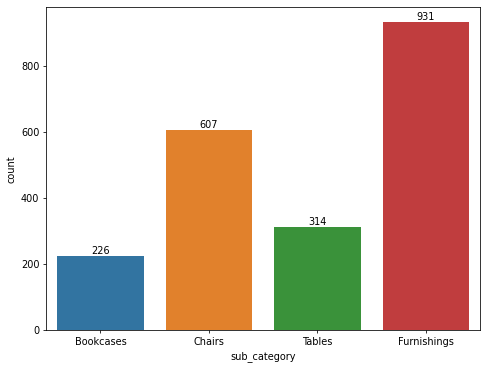

In [59]:
ax = sns.countplot(x = df_furniture.sub_category)
plt.bar_label(ax.containers[0]);

**Mobilya kategorisinde en fazla satılan urun Furnishings(Mefruşat)'lardır**

In [60]:
df_furniture.groupby("sub_category").sales.sum()

sub_category
Bookcases      113813.1987
Chairs         322822.7310
Furnishings     89212.0180
Tables         202810.6280
Name: sales, dtype: float64

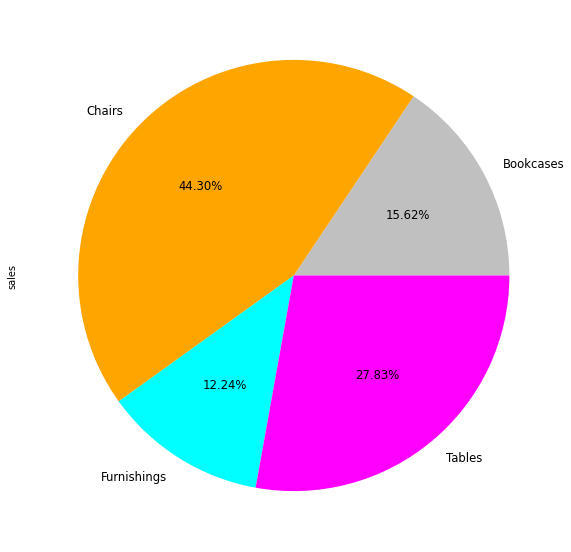

In [61]:
df_furniture.groupby("sub_category").sales.sum().plot(kind = "pie",
                                        colors = ["silver", "orange", "aqua", "magenta"],
                                        figsize = (12,10),
                                        autopct = "%.2f%%",
                                        fontsize = 12);

**En fazla gelir Chairs'tan gelmektedir**

<h4 style= "color: Darkviolet">Sales vs Office Supplies Values and Sub-Category</h4>

In [62]:
df_office = df[df.category == "Office Supplies"]
df_office.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub_category,product_name,sales,order_date_year,order_date_month,ship_date_year,ship_date_month
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2017,12,2017,6
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2016,11,2016,10
6,7,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,2015,9,2015,6
8,9,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,2015,9,2015,6
9,10,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,2015,9,2015,6


In [63]:
df_office.shape

(5909, 22)

In [64]:
df_office.sub_category.value_counts()

Binders       1492
Paper         1338
Storage        832
Art            785
Appliances     459
Labels         357
Envelopes      248
Fasteners      214
Supplies       184
Name: sub_category, dtype: int64

**Bu categoride en fazla satılan ürün Binders'tır**

In [65]:
df_office.groupby("sub_category").sales.sum().sort_values()

sub_category
Fasteners       3001.960
Labels         12347.726
Envelopes      16128.046
Art            26705.410
Supplies       46420.308
Paper          76828.304
Appliances    104618.403
Binders       200028.785
Storage       219343.392
Name: sales, dtype: float64

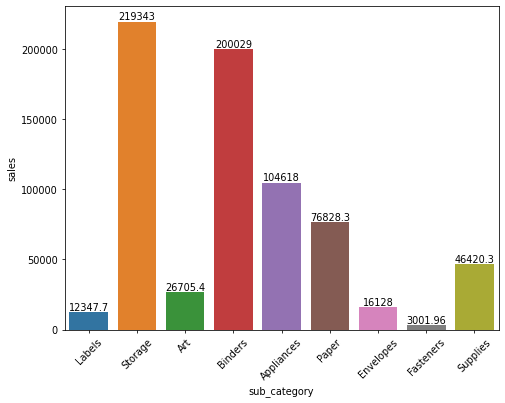

In [66]:
ax = sns.barplot(x = df_office.sub_category, y = df_office.sales, estimator=np.sum, ci = None)
plt.bar_label(ax.containers[0])
plt.xticks(rotation = 45);

**Bu categorideki en fazla gelir elde ettiren ürün Storage'dir**

<h4 style= "color: Darkviolet">Sales vs Technology Values and Sub-Category</h4>

In [67]:
df_tech = df[df.category == "Technology"]
df_tech.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub_category,product_name,sales,order_date_year,order_date_month,ship_date_year,ship_date_month
7,8,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,2015,9,2015,6
11,12,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,2015,9,2015,6
19,20,CA-2015-143336,2015-08-27,2015-01-09,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,2015,8,2015,1
26,27,CA-2017-121755,2017-01-16,2017-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,2017,1,2017,1
35,36,CA-2017-117590,2017-08-12,2017-10-12,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,2017,8,2017,10


In [68]:
df_tech.shape

(1813, 22)

In [69]:
df_tech.sub_category.value_counts()

Phones         876
Accessories    756
Machines       115
Copiers         66
Name: sub_category, dtype: int64

**Teknoloji alanında en fazla satılan ürün Telefondur**

In [70]:
df_tech.groupby("sub_category").sales.sum().sort_values()

sub_category
Copiers        146248.094
Accessories    164186.700
Machines       189238.631
Phones         327782.448
Name: sales, dtype: float64

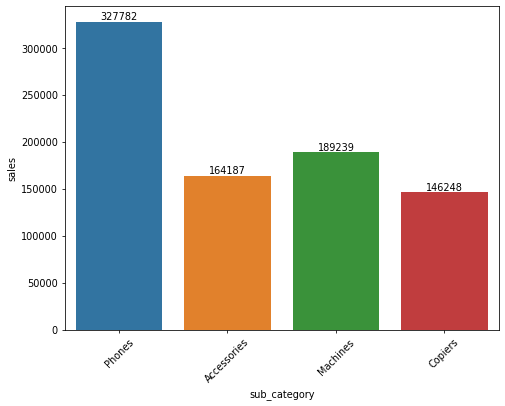

In [71]:
ax = sns.barplot(x = df_tech.sub_category, y = df_tech.sales, estimator=np.sum, ci = None)
plt.bar_label(ax.containers[0])
plt.xticks(rotation = 45);

**En fazla gelir elde ettiren de yine Phones'tur**

<h3 style= "color: Red">Sales vs Category vs Segment</h3>

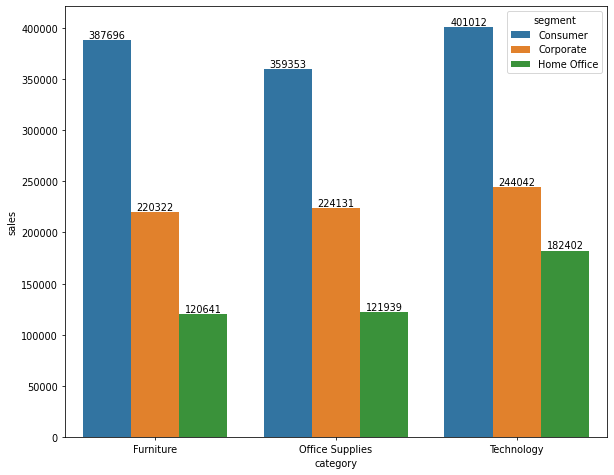

In [72]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x = df.category, y = df.sales, hue = df.segment, ci = None, estimator=np.sum)

for i in ax.containers :
    plt.bar_label(i);

**Tüketici grubunun 3 kategoride de onde oldugu cok bariz ortadadır**

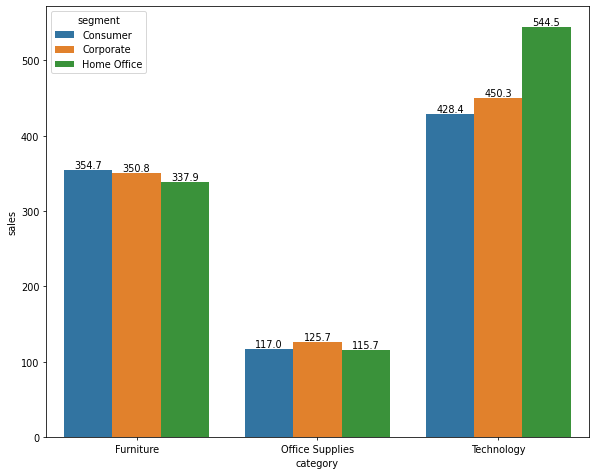

In [73]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x = df.category, y = df.sales, hue = df.segment, ci = None)

for i in ax.containers :
    plt.bar_label(i, fmt = "%.1f");

**Gelir ortalamalarını goz onune alırsak technologt grubunda home office segmentinin bariz bir katkısı oldugu söylenebilir**

<h3 style= "color: Red">Sales vs Category vs Region</h3>

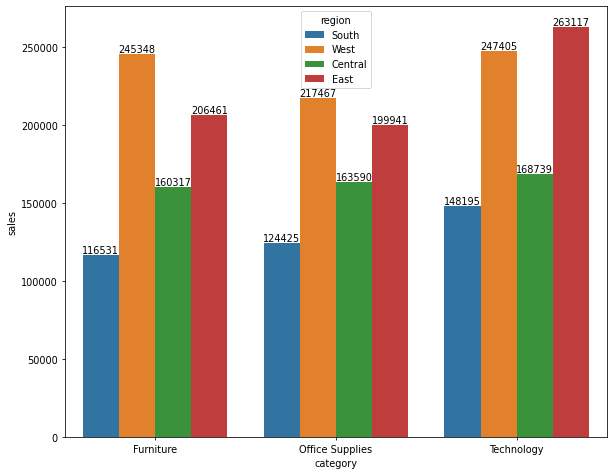

In [74]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x = df.category, y = df.sales, hue = df.region, ci = None, estimator=np.sum)

for i in ax.containers :
    plt.bar_label(i);

**Furniture ve Office Supplies ürünlerinde West bölgesi daha fazla harcarken teknoloji ürünlerinde doğu bölgesi daha baskındır**

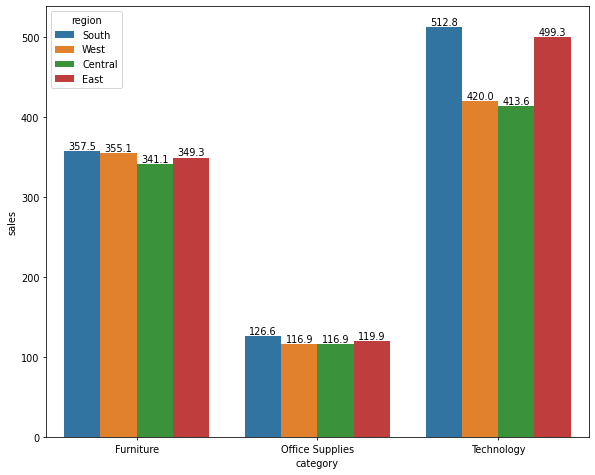

In [75]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x = df.category, y = df.sales, hue = df.region, ci = None)

for i in ax.containers :
    plt.bar_label(i, fmt = "%.1f");

**Ortalama harcalamalara bakacak olursak bölgelere göre dagılımlar yakın ve teknolojı categorisinin daha onde oldugunu gorebılırız**

<h3 style= "color: Red">Sales vs Category vs Ship Mode</h3>

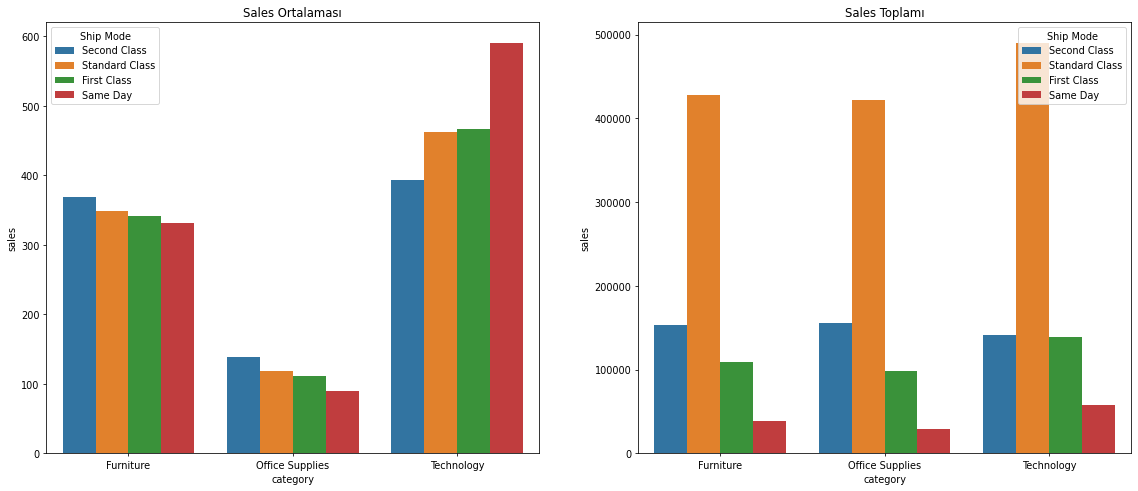

In [77]:
fig, ax = plt.subplots(1,2, figsize = (20,8))

sns.barplot(x = df.category, y = df.sales, hue = df.ship_mode, ci = None, ax = ax[0])
ax[0].set_title("Sales Ortalaması")
ax[0].legend(title = "Ship Mode")

sns.barplot(x = df.category, y = df.sales, hue = df.ship_mode, ci = None, estimator=np.sum, ax = ax[1]);
ax[1].set_title("Sales Toplamı")
ax[1].legend(title = "Ship Mode");

**Sales ortalamasında teknolojı kategorisinin ilk gün teslim ortalaması yuksek ıken, toplam da üç kategoride de standart class gelire daha fazla katkı yapmıştır**

<h3 style= "color: Red">Sales vs Order Date vs Category</h3>

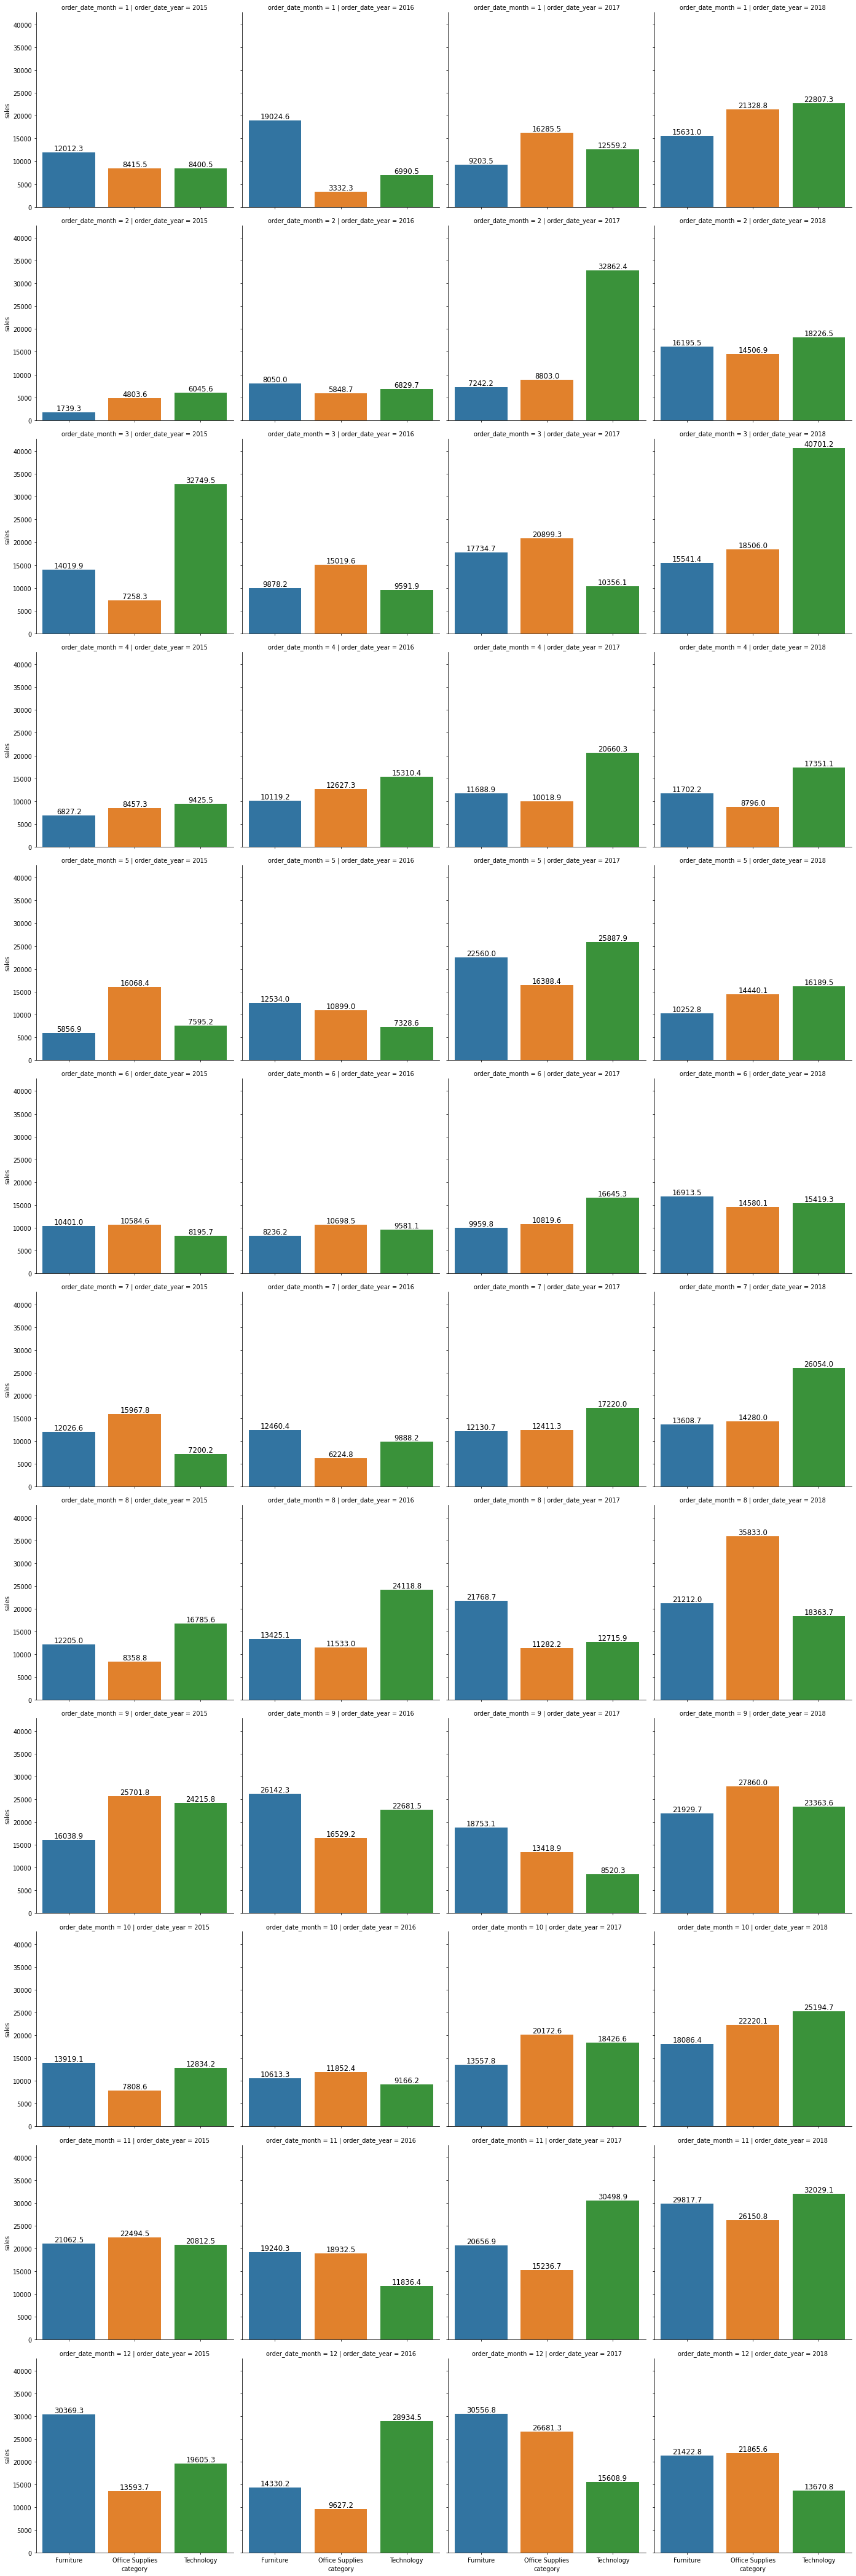

In [78]:
g = sns.catplot(x = "category", y = "sales",
            col = "order_date_year", row = "order_date_month", data = df, kind = "bar",
            estimator = np.sum, ci = None)
for ax in g.axes.ravel():
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", fontsize=12);

**Yıllara ve aylara göre Siparis edilen ürünlerin Categoriksel incelemesi**